In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url1 = '/content/drive/MyDrive/Colab Notebooks/NybSys/data/austin_bikeshare_stations.csv'
url2 = '/content/drive/MyDrive/Colab Notebooks/NybSys/data/austin_bikeshare_trips.csv'

In [ ]:
df_station = pd.read_csv(url1,encoding='utf-8')
df_trip = pd.read_csv(url2,encoding='utf-8')

In [ ]:
missing_station = pd.DataFrame(df_station.isnull().sum()).rename(columns = {0: 'total_missing'})
missing_trip = pd.DataFrame(df_trip.isnull().sum()).rename(columns = {0: 'total_missing'})

print(missing_station)
print(missing_trip)

            total_missing
latitude                0
location                0
longitude               0
name                    0
station_id              0
status                  0
                    total_missing
bikeid                        723
checkout_time                   0
duration_minutes                0
end_station_id              19842
end_station_name                0
month                       30752
start_station_id            19041
start_station_name              0
start_time                      0
subscriber_type              2077
trip_id                         0
year                        30752


# Most common places passengers were picking up as well as dropping off

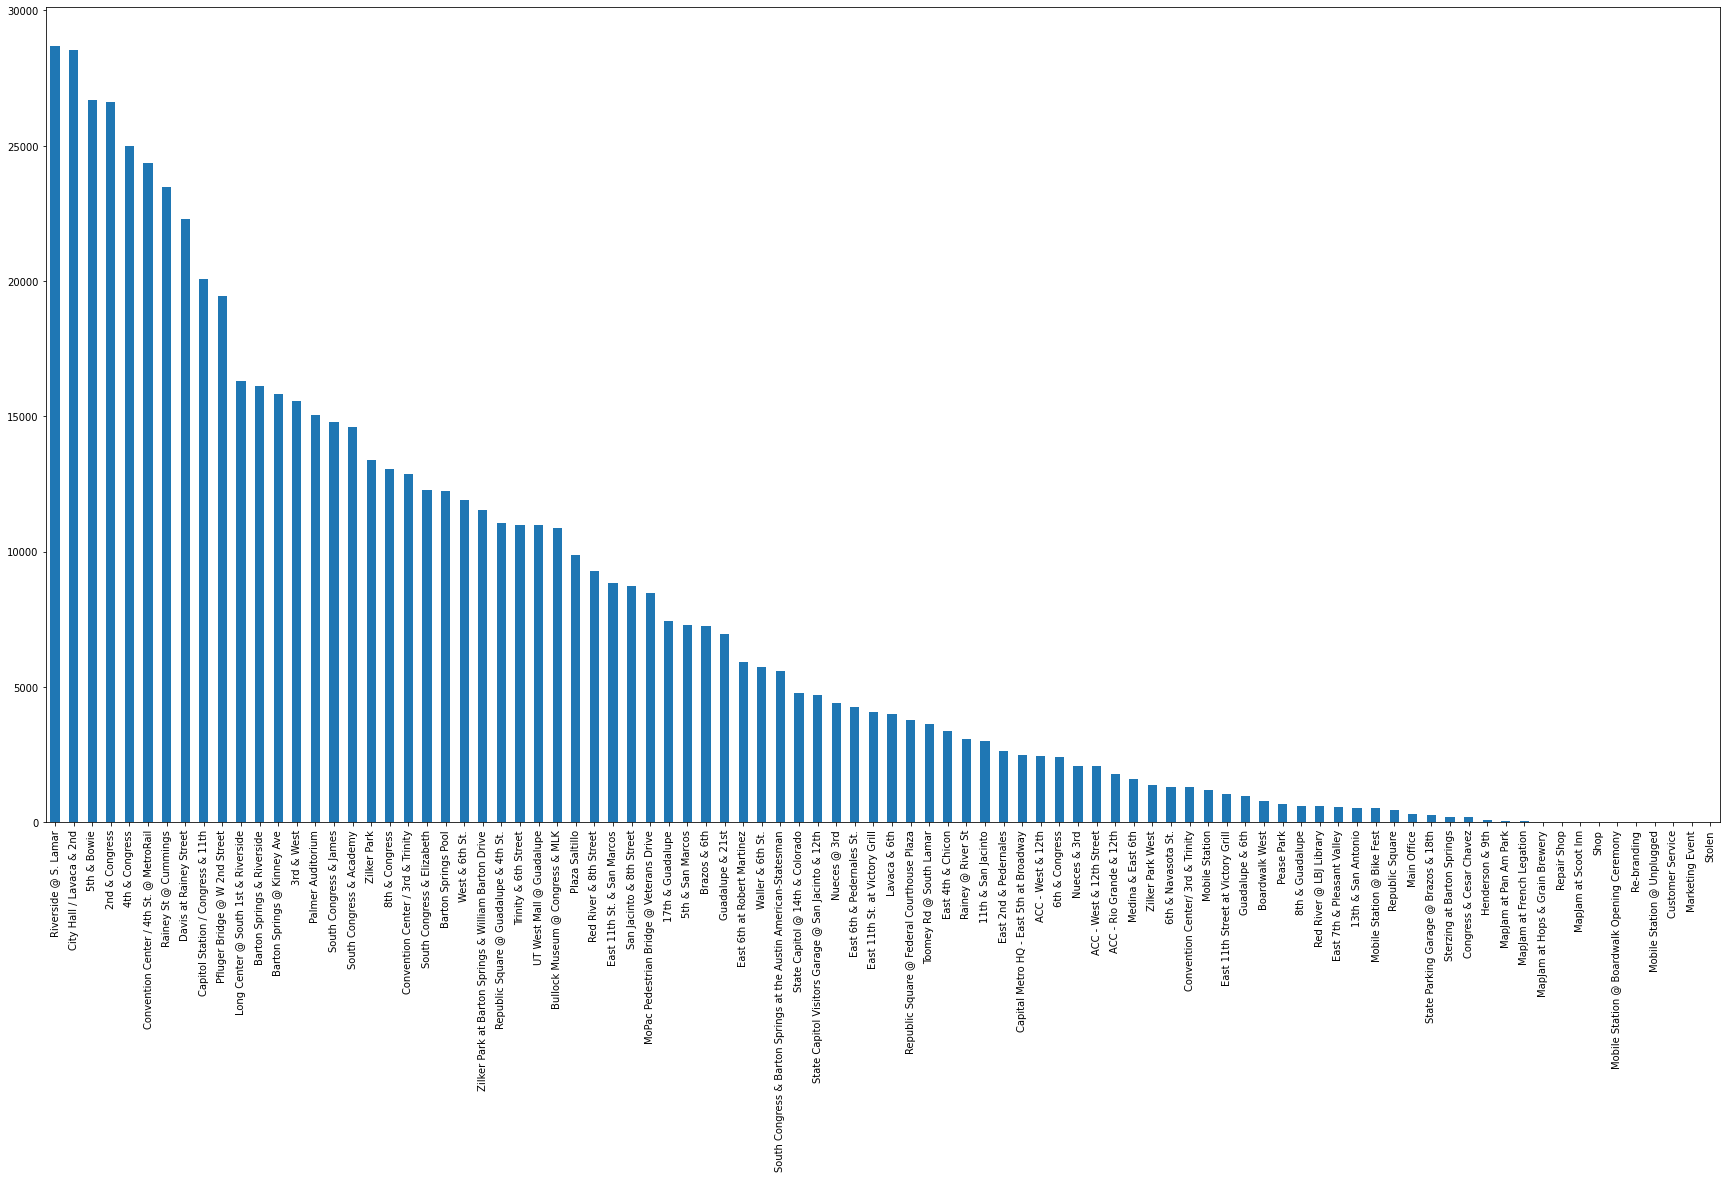

In [ ]:
start_station=df_trip['start_station_name'].value_counts()
plt.figure(figsize=(30,15))
start_station.plot.bar()
plt.show()

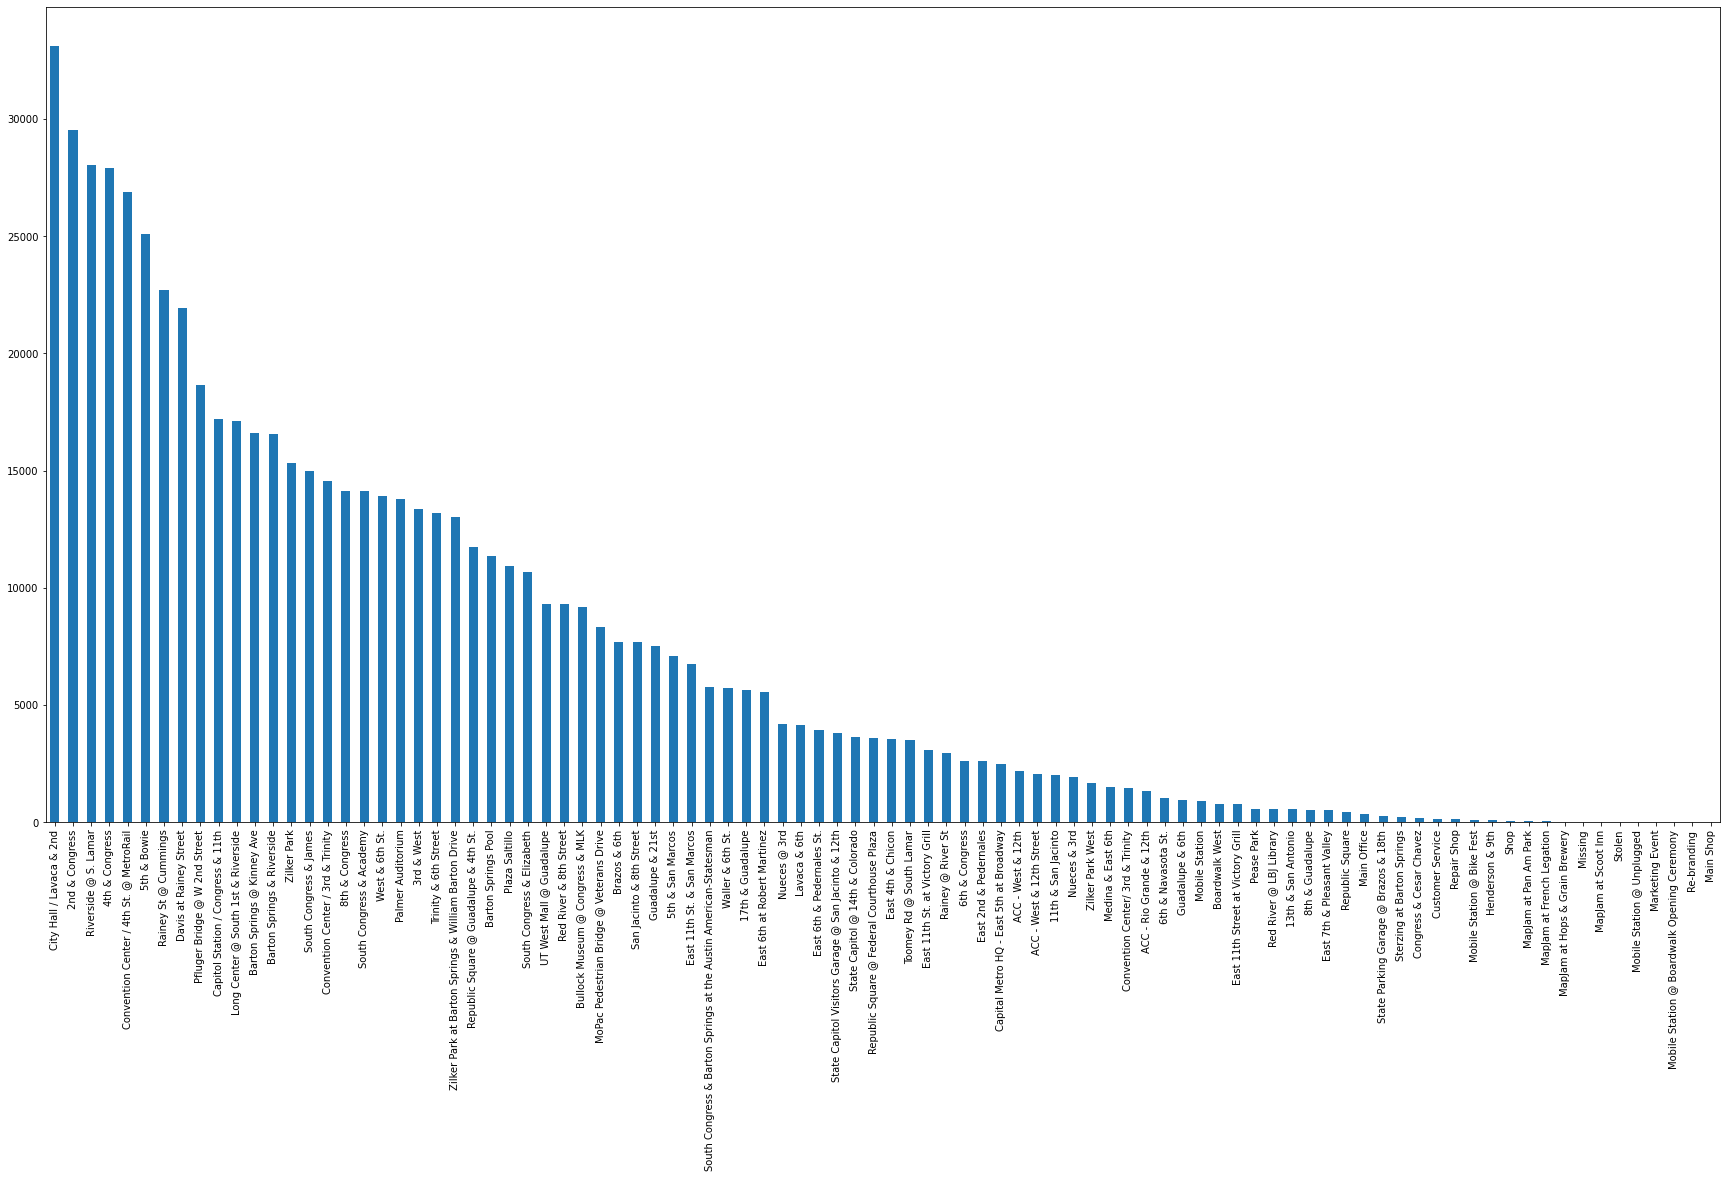

In [ ]:
end_station=df_trip['end_station_name'].value_counts()
plt.figure(figsize=(30,15))
end_station.plot.bar()
plt.show()

#  Busiest time period

In [ ]:
df_trip2 = df_trip.copy()
df_trip2.head(5)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [ ]:
df_trip2.dtypes

bikeid                float64
checkout_time          object
duration_minutes        int64
end_station_id        float64
end_station_name       object
month                 float64
start_station_id      float64
start_station_name     object
start_time             object
subscriber_type        object
trip_id                 int64
year                  float64
dtype: object

In [ ]:
df_trip2['start_time'] = pd.to_datetime(df_trip2['start_time'], format = '%Y/%m/%d %H:%M:%S')

df_trip2['day'] = df_trip2['start_time'].dt.day_name()
df_trip2['hour'] = df_trip2['start_time'].dt.hour

In [ ]:
print(df_trip2['hour'].value_counts())
print(df_trip2['day'].value_counts())

17    56819
16    56643
13    56564
15    56346
14    55631
12    51667
18    47532
11    42441
19    36778
10    31716
20    27161
9     25862
8     21425
21    21279
22    15830
7     10743
23    10376
0      7583
2      5400
1      5305
6      3332
3      1143
5       931
4       724
Name: hour, dtype: int64
Saturday     140846
Sunday       114337
Friday       102187
Monday        77707
Thursday      75704
Wednesday     70007
Tuesday       68443
Name: day, dtype: int64


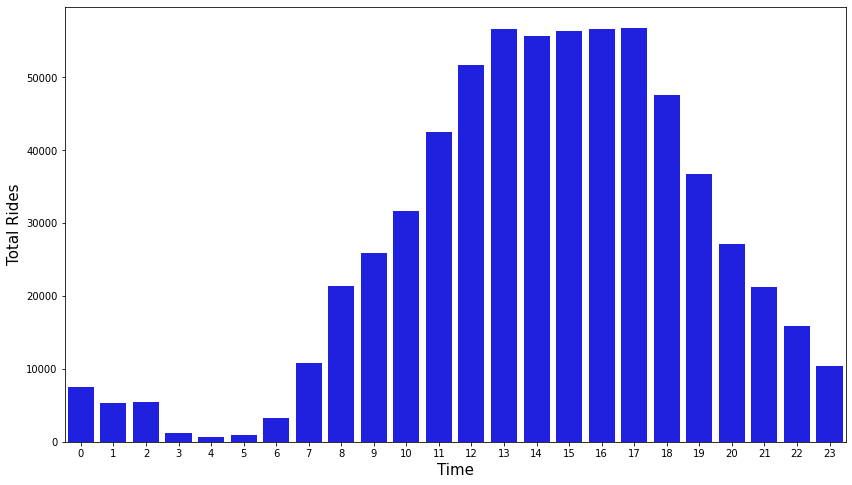

In [ ]:
trips_by_time = df_trip2.groupby('hour').hour.count()
trips_by_day = df_trip2.groupby('day').day.count()
trips_by_time.index = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
trips_by_day.index2 = ["S","Su","M","Tu","W","Th","F"]

ax = sns.barplot(x='index', y='hour', data=trips_by_time.reset_index(), color='blue')
ax.figure.set_size_inches(14,8)
sns.set_style(style='white')
ax.set_xlabel('Time', size=15)
ax.set_ylabel('Total Rides', size=15)
ax.tick_params(labelsize=10)

# Most pickups areas throughout the time

In [ ]:
df_trip2['hour_str']=df_trip2['hour'].astype('str')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

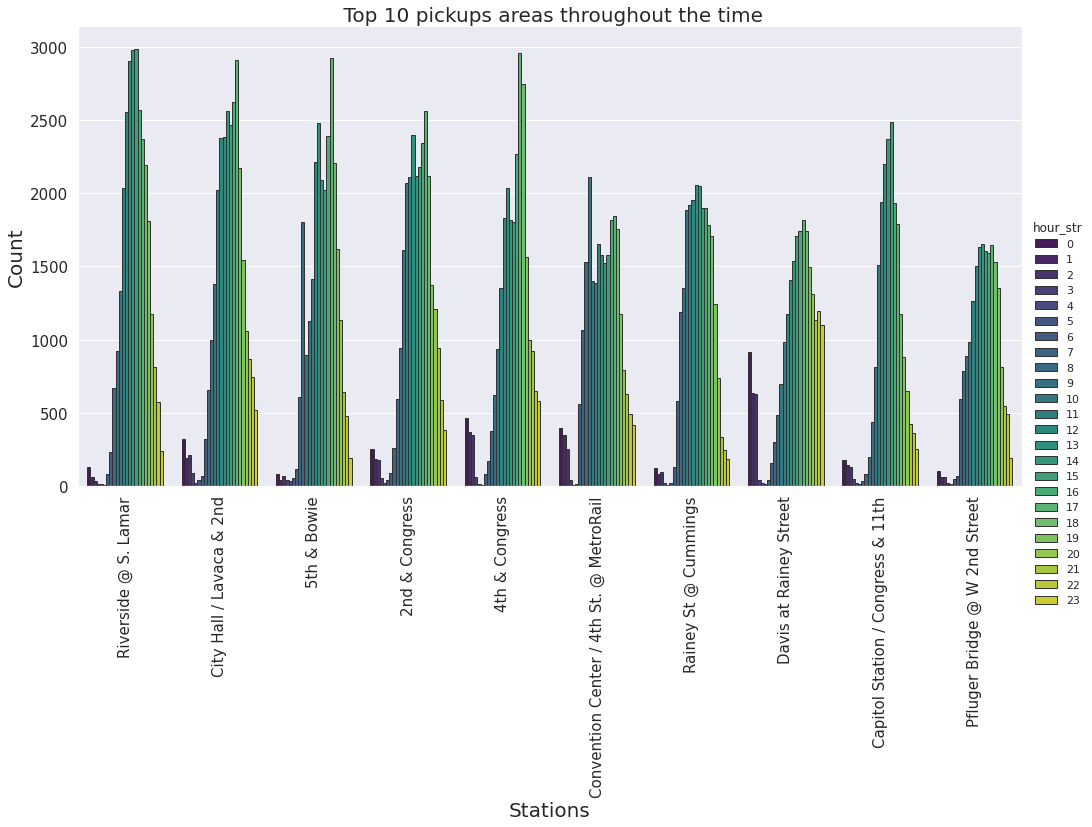

In [ ]:
g = sns.catplot(x="start_station_name",
                #y = 'hour,
                hue="hour_str",
                kind="count",
                palette="viridis",
                edgecolor=".2",
                data=df_trip2,
                height=7,
                aspect =2,
                order=pd.value_counts(df_trip2['start_station_name']).iloc[:10].index,
                hue_order = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"] )
                #hue_order = ["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.ylabel('Count',fontsize=20)
plt.xlabel('Stations',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(' Top 10 pickups areas throughout the time',fontsize=20)

g.set_xticklabels(rotation=90)

# Predict the number of trips for the next 3 year

In [ ]:
df_trip3 = df_trip2.copy()
df_trip4 = df_trip2.copy()

In [ ]:
df_trip3 = df_trip2[['bikeid', 'month', 'start_time', 'year', 'day', 'hour','trip_id']]
df_trip3['Date'] = pd.to_datetime(df_trip3['start_time']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from datetime import datetime


calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df_trip3.start_time.min(), end=df_trip3.start_time.max())

In [ ]:
holidays = pd.to_datetime(holidays, format='%Y/%m/%d').date
df_trip3['holiday'] = df_trip3.start_time.isin(holidays)
df_trip3.holiday = df_trip3.holiday.map(lambda x: 1 if x == True else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_trip3.start_time.min()
df_trip3.start_time.max()

Timestamp('2017-07-31 23:44:27')

In [ ]:
df_trip4 = df_trip4[df_trip4['year'].isin(['2013','2017'])]
df_trip4['Date'] = pd.to_datetime(df_trip4['start_time']).dt.date
df_trip4 = df_trip4.groupby(['Date']).trip_id.count()

In [ ]:
df_trip4 = df_trip4.reset_index()

In [ ]:
df_trip5 = df_trip4.join(df_trip3, lsuffix='Date', how='inner')

In [ ]:
df_trip5 = df_trip5.rename(columns={'trip_idDate': 'trip_count'})

df_trip5 = df_trip5.drop('DateDate',axis=1)
df_trip5 = df_trip5.drop('Date', axis=1)
df_trip5 = df_trip5.drop('start_time',axis=1)
df_trip5 = df_trip5.drop('trip_id',axis=1)
df_trip5 = df_trip5.drop('bikeid',axis=1)

In [ ]:
df_trip5

,trip_count,month,year,day,hour,holiday
0,103,3.0,2015.0,Thursday,19,0
1,117,10.0,2016.0,Sunday,2,0
2,96,3.0,2016.0,Friday,16,0
3,85,11.0,2014.0,Sunday,15,0
4,145,4.0,2017.0,Sunday,15,0
...,...,...,...,...,...,...
157,1226,2.0,2016.0,Saturday,14,0
158,1051,5.0,2014.0,Tuesday,12,0
159,828,3.0,2017.0,Saturday,0,0
160,568,5.0,2016.0,Friday,14,0


In [ ]:
df_trip5=df_trip5.dropna()

In [ ]:
#df_trip3.name = 'trip_count'

In [ ]:
y_data = df_trip5.iloc[:, 0]
x_data = df_trip5.drop('trip_count', axis=1)

In [ ]:
y_data

0       103
1       117
2        96
3        85
4       145
       ... 
157    1226
158    1051
159     828
160     568
161     483
Name: trip_count, Length: 154, dtype: int64

In [ ]:
#x_data=x_data.dropna()
#y_data=y_data.dropna()

In [ ]:
#x_data['day'] = pd.to_numeric(x_data['day'])

#x_data['day'] = x_data['day'].astype(int)

x_data['day']=x_data['day'].astype('category').cat.codes

In [ ]:
from sklearn.model_selection import train_test_split

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split( 
    x_data, y_data, test_size = .3, random_state = 13, shuffle=True)

In [ ]:
from sklearn import linear_model

In [ ]:
x_data_train.dtypes

month      float64
year       float64
day           int8
hour         int64
holiday      int64
dtype: object

In [ ]:
m = pd.DataFrame(x_data_train.isnull().sum()).rename(columns = {0: 'total_missing'})
m

,total_missing
month,0
year,0
day,0
hour,0
holiday,0


In [ ]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(x_data_train, y_data_train)
ridgeScore = reg.score(x_data_test, y_data_test)
print(ridgeScore)

0.01234320377574949


In [ ]:
rideCountsPredictions = reg.predict(x_data_test)
rideCountsActual = y_data_test.to_numpy()

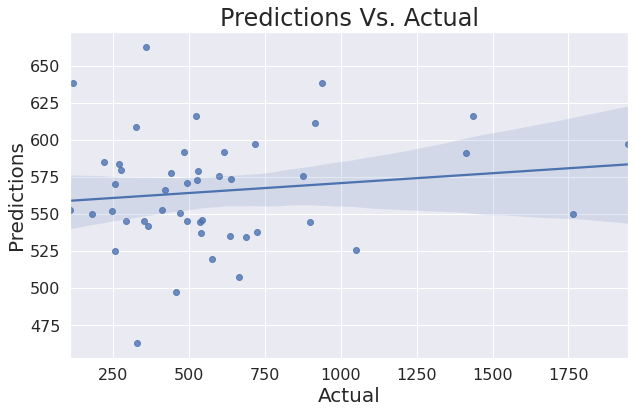

In [ ]:
ax = sns.regplot(x=rideCountsActual, y=rideCountsPredictions)
ax.figure.set_size_inches(10,6)
ax.axes.set_title('Predictions Vs. Actual', fontsize=24)
ax.set_xlabel('Actual', fontsize=20)
ax.set_ylabel('Predictions', fontsize=20)
ax.tick_params(labelsize=16)

# Heatmap

In [ ]:
df_trip6 = df_trip2.copy()

In [ ]:
value_counts = df_trip6['start_station_name'].value_counts(dropna=True, sort=True)

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_trip7 = df_val_counts.reset_index()
df_trip7.columns = ['name', 'total_trip']

In [ ]:
df_trip7

,name,total_trip
0,Riverside @ S. Lamar,28695
1,City Hall / Lavaca & 2nd,28535
2,5th & Bowie,26669
3,2nd & Congress,26612
4,4th & Congress,24972
...,...,...
85,Re-branding,7
86,Mobile Station @ Unplugged,4
87,Customer Service,4
88,Marketing Event,4


In [ ]:
df_trip7 = df_trip7.merge(df_station,on='name',how = 'inner')

In [ ]:
df_trip7

,name,total_trip,latitude,location,longitude,station_id,status
0,Riverside @ S. Lamar,28695,30.26446,(30.26446 -97.75665),-97.75665,2575,active
1,City Hall / Lavaca & 2nd,28535,30.26476,(30.26476 -97.74678),-97.74678,2499,active
2,5th & Bowie,26669,30.26960,(30.2696 -97.75332),-97.75332,2501,active
3,2nd & Congress,26612,30.26408,(30.26408 -97.74355),-97.74355,2494,active
4,4th & Congress,24972,30.26634,(30.26634 -97.74378),-97.74378,2495,active
...,...,...,...,...,...,...,...
65,Republic Square,453,30.26751,(30.26751 -97.74802),-97.74802,2500,moved
66,State Parking Garage @ Brazos & 18th,250,30.27907,(30.27907 -97.73715),-97.73715,1005,closed
67,Sterzing at Barton Springs,198,30.26406,(30.26406 -97.76385),-97.76385,3686,active
68,Congress & Cesar Chavez,182,30.26332,(30.26332 -97.74508),-97.74508,3684,active


In [ ]:
import folium
from folium import plugins

In [ ]:
middle_lat = df_trip7['latitude'].median()
middle_lon = df_trip7['longitude'].median()
hmap = folium.Map(location=[middle_lat, middle_lon],tiles = "Stamen Terrain",zoom_start=11)

In [ ]:
max_trip = float(df_trip7['total_trip'].max())

In [ ]:
hm_wide = plugins.HeatMap( list(zip(df_trip7.latitude.values, df_trip7.longitude.values, df_trip7.total_trip.values)),
                   min_opacity=0.2,
                   max_val=max_trip,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

In [ ]:
#folium.add_to(hmap)
hmap.add_child(hm_wide)